<a href="https://colab.research.google.com/github/Rohitsingh24-cloud/deeplearnproject/blob/main/catvsdogclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd

In [63]:
import numpy as np

In [64]:
import tensorflow

In [65]:
from tensorflow import keras

In [66]:
!mkdir -p ~/.kaggle

In [67]:
!cp kaggle.json ~/.kaggle/

In [68]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
import zipfile

In [70]:
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')

In [71]:
zip_ref.extractall('/content')

In [72]:
zip_ref.close()

In [73]:
 from keras import Sequential

In [74]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [75]:
#generators        it is usd to give data in batch bcs we have limited memory

In [76]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train', labels='inferred', label_mode='int',batch_size=32, image_size=(256, 256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test', labels='inferred', label_mode='int',batch_size=32, image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [77]:
#normalise

In [78]:
def process(image,label):
  image=image/255
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [79]:
#map function take every image and transfer to process and and process return the image aback after transformation

In [80]:
#we do normalise so that we want or pixel in range 0 to 1 else it create issue

In [81]:
model=Sequential()

In [82]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.add(BatchNormalization())

In [84]:
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [85]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

In [86]:
model.add(BatchNormalization())

In [87]:
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [88]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

In [89]:
model.add(BatchNormalization())

In [90]:
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [91]:
model.add(Flatten())

In [92]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
history=model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.5803 - loss: 2.5853 - val_accuracy: 0.6766 - val_loss: 0.6046
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6929 - loss: 0.5791 - val_accuracy: 0.7522 - val_loss: 0.5092
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7663 - loss: 0.4887 - val_accuracy: 0.7238 - val_loss: 0.6447
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.8045 - loss: 0.4270 - val_accuracy: 0.6970 - val_loss: 0.5984
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8369 - loss: 0.3681 - val_accuracy: 0.7400 - val_loss: 0.6614
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.8721 - loss: 0.2904 - val_accuracy: 0.6500 - val_loss: 1.1361
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9171 - loss: 0.2058 - val_accuracy: 0.6768 - val_loss: 1.5393
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.9460 - loss: 0.1482 - 

In [96]:
import matplotlib.pyplot as plt

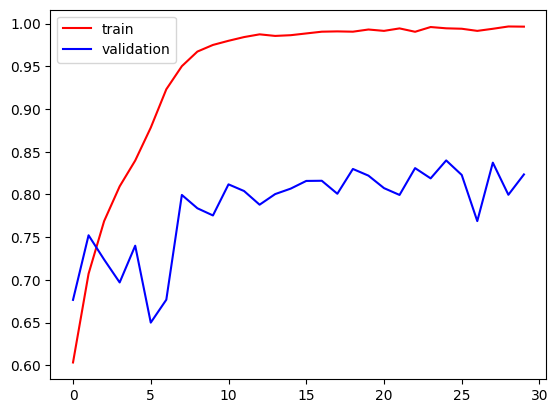

In [97]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

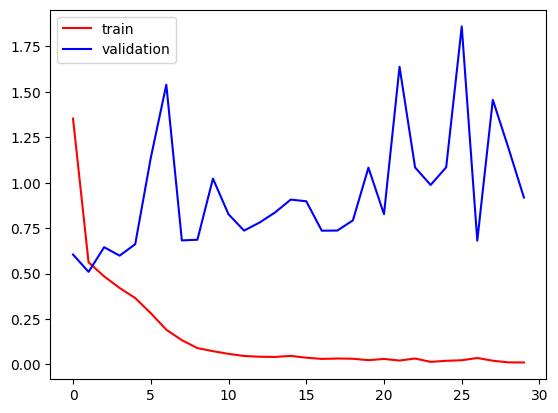

In [98]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [99]:
import cv2

In [100]:
test_img=cv2.imread('/content/pexels-pixabay-104827.jpg')

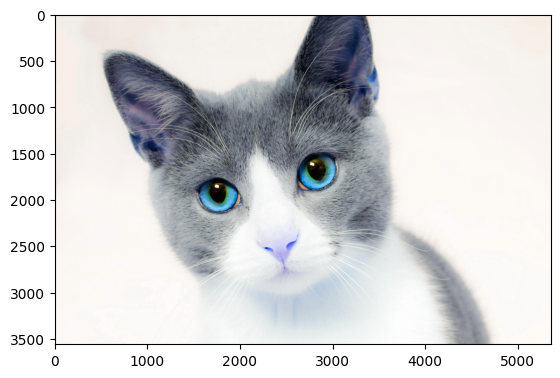

In [101]:
plt.imshow(test_img)

In [102]:
test_img.shape

(3560, 5360, 3)

In [103]:
test_img=cv2.resize(test_img,(256,256))

In [104]:
test_input=test_img.reshape((1,256,256,3))

In [105]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


array([[0.]], dtype=float32)

In [106]:
test_img2=cv2.imread('/content/maltese-1123016_1280.jpg')

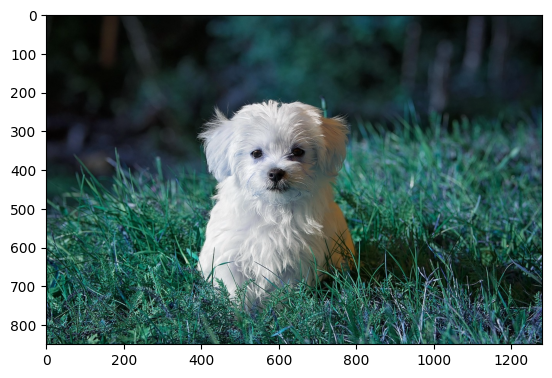

In [107]:
plt.imshow(test_img2)

In [108]:
test_img2=cv2.resize(test_img2,(256,256))

In [109]:
test_input2=test_img2.reshape((1,256,256,3))

In [110]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[1.]], dtype=float32)